# heart_disease bayesian_network stacking

Training on heart_disease dataset using bayesian_network model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declaring real dataset and splitting into train/test

In [2]:
# Read hearts data
data_real = pd.read_csv("Data\hearts_data.csv")
data_real = data_real.dropna()
gen_method = "bayesian_network"
target = "target"

In [3]:
# Split hearts data into 80/20 train and test
data_train, data_test = train_test_split(data_real, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv("Data\hearts_train.csv", index=False)
data_test.to_csv("Data\hearts_test.csv", index=False)

In [4]:
data_train = Load("Data\hearts_train.csv")
data_test = Load("Data\hearts_test.csv")

Generating train split: 952 examples [00:00, 40704.79 examples/s]
Generating train split: 238 examples [00:00, 59257.06 examples/s]


# syn_v1

In [5]:
# Synthesize data
gen_count = data_real.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v1.csv", key="synth")

[2024-05-07T18:23:59.770243+0200][3808][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train': Dataset({
    features: ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target'],
    num_rows: 952
}), 'test': None, 'synth':       age  sex  chest pain type  resting bp s  cholesterol  \
0      58    1                4           134          233   
1      35    1                4            88          241   
2      43    1                4           150          257   
3      67    0                4            98          226   
4      57    0                3           119          215   
...   ...  ...              ...           ...          ...   
1185   53    1                2           142          225   
1186   43    1                4           118          244   
1187   36    1                2           134          245   
1188   56    1                4           138          318   
1189   71    1                3           112          300   

 

# syn_v2

In [6]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with real data
data_stack = pd.concat([data_real, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v1.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v1_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v1_test.csv", index=False)


In [7]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v2.csv", key="synth")

[2024-05-07T18:24:56.840222+0200][3808][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2121   63    1                4           189           10   
457    61    1                3           120            0   
1738   59    1                2           118          260   
883    44    1                2           120          263   
2279   58    1                4           121          251   
...   ...  ...              ...           ...          ...   
1638   65    1                4           141          358   
1095   55    1                2           130          262   
1130   61    1                1           134          234   
1294   50    1                2           128          166   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2121                    1            0              99                0   
457                     0            0              80                1   
1738               

# syn_v3

In [8]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v2.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v2_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v2_test.csv", index=False)


In [9]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v3.csv", key="synth")

[2024-05-07T18:26:11.127532+0200][3808][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
624    59    1                4           110          239   
4522   63    1                4           118            0   
4227   61    0                1           122          232   
3135   54    1                3           143          306   
1554   48    1                4           129          271   
...   ...  ...              ...           ...          ...   
4426   59    0                3           122          282   
466    42    1                3           134          240   
3092   39    1                2           126          258   
3772   55    1                4           131          202   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
624                     0            2             142                1   
4522                    1            0             106                1   
4227               

# syn_v4

In [10]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v3.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v3_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v3_test.csv", index=False)

In [11]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v4.csv", key="synth")

[2024-05-07T18:26:12.976740+0200][3808][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2484   63    1                4           140          191   
3016   58    1                1           158            0   
5292   29    1                3           101          217   
7932   56    0                3           141          258   
4734   57    1                2           120          331   
...   ...  ...              ...           ...          ...   
5734   58    1                4           131          573   
5191   35    1                2           110          252   
5390   63    1                3             0            0   
860    62    0                4           140          268   
7270   77    1                4           117          277   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2484                    0            2             145                1   
3016                    1            0             153                1   
5292               

# syn_v5

In [12]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v4.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v4_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v4_test.csv", index=False)

In [13]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v5.csv", key="synth")

[2024-05-07T18:26:15.718879+0200][3808][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
2006    55    1                4           125          162   
1288    51    1                2           139          275   
18494   61    1                4           161          132   
15527   41    1                4           125            0   
12341   43    1                4           129          230   
...    ...  ...              ...           ...          ...   
11284   63    1                4           132            0   
11964   77    0                4           200           26   
5390    63    1                3             0            0   
860     62    0                4           140          268   
15795   57    1                4           113          161   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2006                     0            1             123                1   
1288                     0            0             157                1   
1849

# stack_v5 - Final stack

In [14]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v5.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v5_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [15]:
# Train stack_v5 and save as state
state_stack_v5 = Load(data_train).Train(plugin=gen_method)

[2024-05-07T18:26:23.509288+0200][3808][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


# stack_v5 (synth only)

In [16]:
# Remove first 1190 rows, equal to the real data, from stack_v5
data_stack_synth_only = data_stack.iloc[1190:,:]

# Save to csv
data_stack_synth_only.to_csv(f"{gen_method}\hearts_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
data_train, data_test = train_test_split(data_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_synth_only_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [17]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(data_train).Train(plugin=gen_method)

[2024-05-07T18:26:35.664452+0200][3808][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


# Generate synth data based on stack_v5

In [18]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
22594   50    0                4           161          196   
1510    40    0                3           135          186   
26995   57    1                4           130          319   
14320   56    1                1           104          194   
34943   62    1                3           142            1   
...    ...  ...              ...           ...          ...   
16850   47    1                4           140          195   
6265    58    1                4           119          263   
11284   63    1                4           132            0   
860     62    0                4           140          268   
15795   57    1                4           113          161   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
22594                    0            0             150                0   
1510                     0            0             146                0   
2699

In [19]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [20]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
19876   31    1                3           102          323   
6191    54    1                4           144            0   
3687    38    1                4           107            0   
1440    65    0                4           135          185   
28826   66    1                4           128          130   
...    ...  ...              ...           ...          ...   
18040   68    0                4           100          177   
7455    29    1                2           134          222   
12474   53    1                4           119            0   
2050    73    1                1           122          293   
16985   54    1                4           132            2   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
19876                    0            1             123                0   
6191                     0            0             121                1   
3687

In [21]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [22]:
# Read train and test data (this is base/real train and test data, not the stack data)
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read syn_v1 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_real = S.evaluate(data_syn,target,"full_eval")
res_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.009955,0.003088,0.990045,0.003088
1,pca_eigval_diff,u,0.087932,NaN,0.912068,NaN
2,pca_eigvec_ang,u,0.885263,NaN,0.718212,NaN
3,avg_cio,u,0.264686,0.162193,0.264686,0.162193
4,corr_mat_diff,u,1.064197,NaN,0.983876,NaN
5,mutual_inf_diff,u,0.555304,NaN,0.991586,NaN
6,ks_tvd_stat,u,0.036907,0.009028,0.963093,0.009028
7,frac_ks_sigs,u,0.166667,NaN,0.833333,NaN
8,avg_h_dist,u,0.009086,0.002962,0.990914,0.002962
9,avg_pMSE,u,0.003006,0.000322,0.987975,0.001290


# Eval on syn_2

In [23]:
# Read train and test data from stack_v1
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v1_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v1_test.csv")

# Read syn_v2 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v1 = S.evaluate(data_syn,target,"full_eval")
res_stack_v1

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.016253,0.002233,0.983747,0.002233
1,pca_eigval_diff,u,0.035714,NaN,0.964286,NaN
2,pca_eigvec_ang,u,0.497949,NaN,0.841498,NaN
3,avg_cio,u,0.175926,0.175926,0.175926,0.175926
4,corr_mat_diff,u,0.511275,NaN,0.992253,NaN
5,mutual_inf_diff,u,0.272080,NaN,0.995878,NaN
6,ks_tvd_stat,u,0.049963,0.007696,0.950037,0.007696
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.016058,0.005090,0.983942,0.005090
9,avg_pMSE,u,0.006454,0.000280,0.974185,0.001121


# Eval on syn_3

In [24]:
# Read train and test data from stack_v2
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v2_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v2_test.csv")

# Read syn_v3 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v2 = S.evaluate(data_syn,target,"full_eval")
res_stack_v2

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.014004,0.001612,0.985996,0.001612
1,pca_eigval_diff,u,0.023081,NaN,0.976919,NaN
2,pca_eigvec_ang,u,0.359742,NaN,0.885491,NaN
3,avg_cio,u,0.117965,0.117965,0.117965,0.117965
4,corr_mat_diff,u,0.340038,NaN,0.994848,NaN
5,mutual_inf_diff,u,0.150445,NaN,0.997721,NaN
6,ks_tvd_stat,u,0.038233,0.007651,0.961767,0.007651
7,frac_ks_sigs,u,0.583333,NaN,0.416667,NaN
8,avg_h_dist,u,0.010911,0.003086,0.989089,0.003086
9,avg_pMSE,u,0.004547,0.000164,0.981810,0.000656


# Eval on syn_4

In [25]:
# Read train and test data from stack_v3
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v3_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v3_test.csv")

# Read syn_v4 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v3 = S.evaluate(data_syn,target,"full_eval")
res_stack_v3

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.013319,0.001155,0.986681,0.001155
1,pca_eigval_diff,u,0.030357,NaN,0.969643,NaN
2,pca_eigvec_ang,u,0.745011,NaN,0.762856,NaN
3,avg_cio,u,0.135961,0.135961,0.135961,0.135961
4,corr_mat_diff,u,0.304684,NaN,0.995384,NaN
5,mutual_inf_diff,u,0.128384,NaN,0.998055,NaN
6,ks_tvd_stat,u,0.027169,0.007980,0.972831,0.007980
7,frac_ks_sigs,u,0.416667,NaN,0.583333,NaN
8,avg_h_dist,u,0.005239,0.001936,0.994761,0.001936
9,avg_pMSE,u,0.003086,0.000058,0.987656,0.000233


# Eval on syn_5

In [26]:
# Read train and test data from stack_v4
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v4_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v4_test.csv")

# Read syn_v5 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v4 = S.evaluate(data_syn,target,"full_eval")
res_stack_v4

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.009143,0.000825,0.990857,0.000825
1,pca_eigval_diff,u,0.028084,NaN,0.971916,NaN
2,pca_eigvec_ang,u,0.347353,NaN,0.889434,NaN
3,avg_cio,u,0.163021,0.163021,0.163021,0.163021
4,corr_mat_diff,u,0.227413,NaN,0.996554,NaN
5,mutual_inf_diff,u,0.105791,NaN,0.998397,NaN
6,ks_tvd_stat,u,0.019536,0.003665,0.980464,0.003665
7,frac_ks_sigs,u,0.750000,NaN,0.250000,NaN
8,avg_h_dist,u,0.005443,0.001715,0.994557,0.001715
9,avg_pMSE,u,0.001427,0.000063,0.994293,0.000253


# Eval on stack_v5 to real data

This evaluation will be different. We will evaluate the synth data generated based off our training of stack_v5, but we will insert the real_data train and test set, in order to see how close or far the stacked synthetic data compares to the original data.

In [27]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_v5_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v5_on_real = S.evaluate(data_syn,target,"full_eval")
res_stack_v5_on_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.039291,0.003139,0.960709,0.003139
1,pca_eigval_diff,u,0.114275,NaN,0.885725,NaN
2,pca_eigvec_ang,u,1.205644,NaN,0.616232,NaN
3,avg_cio,u,0.014343,0.014343,0.014343,0.014343
4,corr_mat_diff,u,1.400845,NaN,0.978775,NaN
5,mutual_inf_diff,u,0.649563,NaN,0.990158,NaN
6,ks_tvd_stat,u,0.077729,0.021721,0.922271,0.021721
7,frac_ks_sigs,u,0.666667,NaN,0.333333,NaN
8,avg_h_dist,u,0.067753,0.053389,0.932247,0.053389
9,avg_pMSE,u,0.025725,0.000904,0.897102,0.003614


# Eval on stack_synth_only to real data

We will do the same as above, but with the synth data generated based off our training of stack_synth_only.

In [28]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_synth_only_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_synth_only_on_real = S.evaluate(data_syn,target,"full_eval")
res_stack_synth_only_on_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.037090,0.003182,0.962910,0.003182
1,pca_eigval_diff,u,0.114587,NaN,0.885413,NaN
2,pca_eigvec_ang,u,1.282870,NaN,0.591650,NaN
3,avg_cio,u,0.126779,0.126779,0.126779,0.126779
4,corr_mat_diff,u,1.417326,NaN,0.978525,NaN
5,mutual_inf_diff,u,0.652356,NaN,0.990116,NaN
6,ks_tvd_stat,u,0.080430,0.020939,0.919570,0.020939
7,frac_ks_sigs,u,0.583333,NaN,0.416667,NaN
8,avg_h_dist,u,0.016582,0.006716,0.983418,0.006716
9,avg_pMSE,u,0.022631,0.000833,0.909477,0.003331


# Multiple plots for evaluation comparisons

# Evaluating synth stacks over time

In [29]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4"]

In [30]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.284664,0.487745,0.035714
res_stack_v1,0.359244,0.470448,0.012080
res_stack_v2,0.402836,0.469783,0.027836
res_stack_v3,0.437237,0.460110,0.024554
res_stack_v4,0.470391,0.450801,0.016610


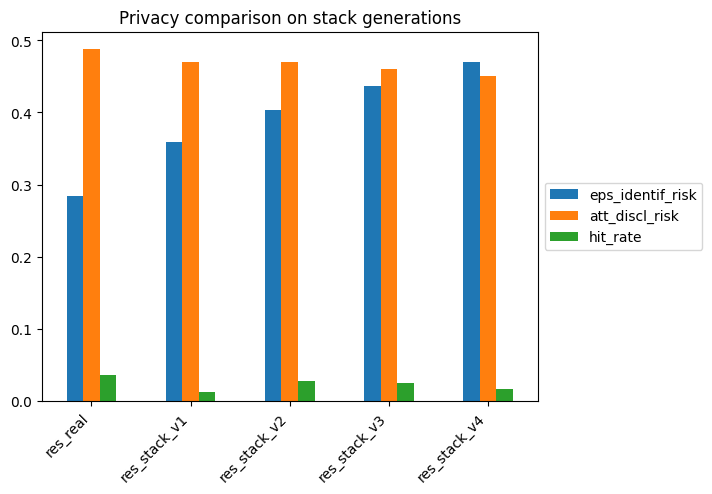

In [31]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [32]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.009955,0.087932,0.885263
res_stack_v1,0.016253,0.035714,0.497949
res_stack_v2,0.014004,0.023081,0.359742
res_stack_v3,0.013319,0.030357,0.745011
res_stack_v4,0.009143,0.028084,0.347353


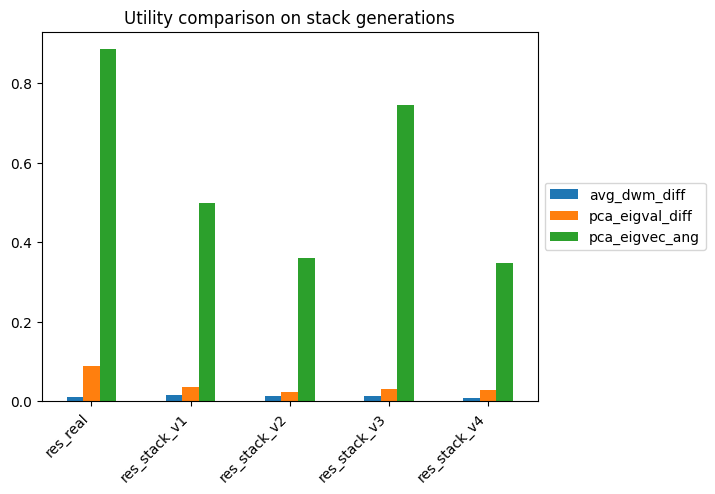

In [33]:
utility_plot.plot.bar()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [34]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,1.064197,0.555304
res_stack_v1,0.511275,0.272080
res_stack_v2,0.340038,0.150445
res_stack_v3,0.304684,0.128384
res_stack_v4,0.227413,0.105791


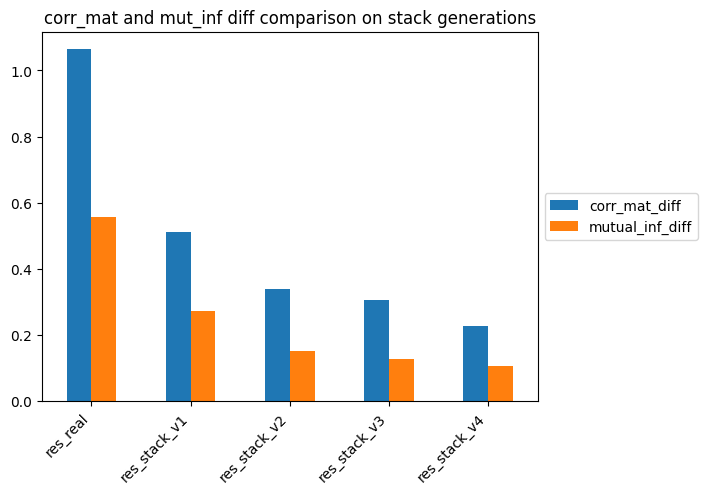

In [35]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [36]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "auroc",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["auroc", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,...,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,auroc,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.009955,0.087932,0.885263,0.264686,1.064197,0.555304,0.036907,0.166667,0.009086,0.003006,...,0.038054,0.657353,0.090406,0.072508,0.060924,0.017121,0.035714,0.284664,0.996639,0.487745
res_stack_v1,0.016253,0.035714,0.497949,0.175926,0.511275,0.272080,0.049963,0.833333,0.016058,0.006454,...,-0.003841,0.637815,-0.076436,0.064069,0.078256,0.016103,0.012080,0.359244,0.978151,0.470448
res_stack_v2,0.014004,0.023081,0.359742,0.117965,0.340038,0.150445,0.038233,0.583333,0.010911,0.004547,...,0.000052,0.626891,-0.039251,0.056659,0.049370,0.005440,0.027836,0.402836,0.979832,0.469783
res_stack_v3,0.013319,0.030357,0.745011,0.135961,0.304684,0.128384,0.027169,0.416667,0.005239,0.003086,...,0.000976,0.589693,-0.017100,0.058201,0.046218,0.049098,0.024554,0.437237,0.934664,0.460110
res_stack_v4,0.009143,0.028084,0.347353,0.163021,0.227413,0.105791,0.019536,0.750000,0.005443,0.001427,...,0.005018,0.560721,-0.016778,0.042822,0.039982,0.032028,0.016610,0.470391,0.953782,0.450801


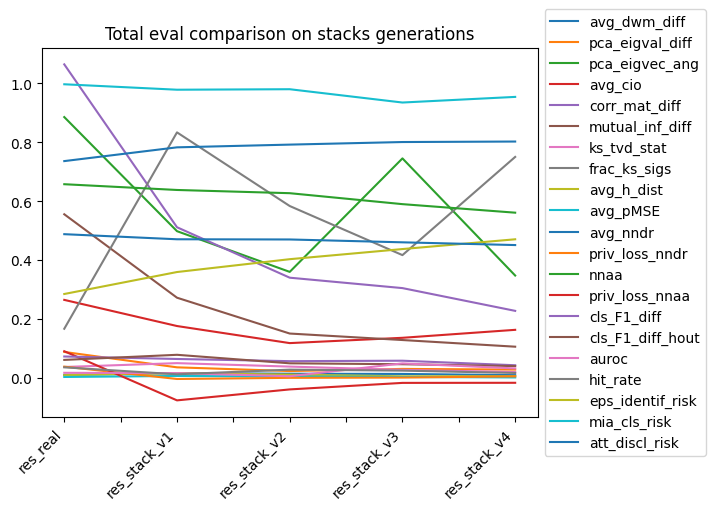

In [37]:
total_eval.plot.line()
plt.title("Total eval comparison on stacks generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [38]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.844849,0.723296
1,res_stack_v1,0.802298,0.720509
2,res_stack_v2,0.826422,0.714527
3,res_stack_v3,0.831711,0.720790
4,res_stack_v4,0.825281,0.713374


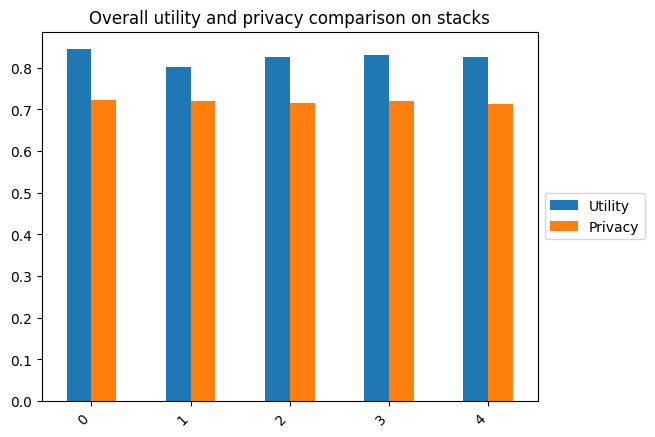

In [39]:
overall_res.plot.bar()
plt.title("Overall utility and privacy comparison on stacks")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Evaluting final stacks compared to real data

In [40]:
eval_results = [res_real, res_stack_v5_on_real, res_stack_synth_only_on_real]
eval_str = ["res_real", "res_stack_v5_on_real", "res_stack_synth_only_on_real"]

In [41]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.284664,0.487745,0.035714
res_stack_v5_on_real,0.218487,0.427171,0.003151
res_stack_synth_only_on_real,0.185924,0.411905,0.000000


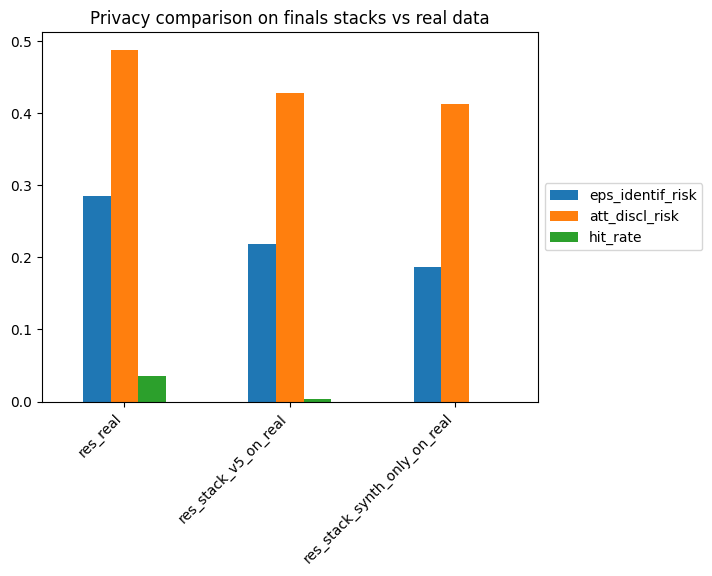

In [42]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [43]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.009955,0.087932,0.885263
res_stack_v5_on_real,0.039291,0.114275,1.205644
res_stack_synth_only_on_real,0.037090,0.114587,1.282870


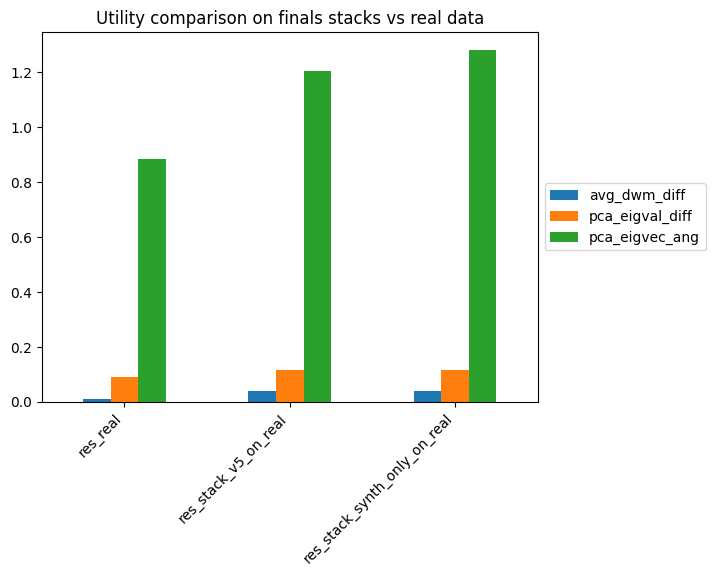

In [44]:
utility_plot.plot.bar()
plt.title("Utility comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [45]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,1.064197,0.555304
res_stack_v5_on_real,1.400845,0.649563
res_stack_synth_only_on_real,1.417326,0.652356


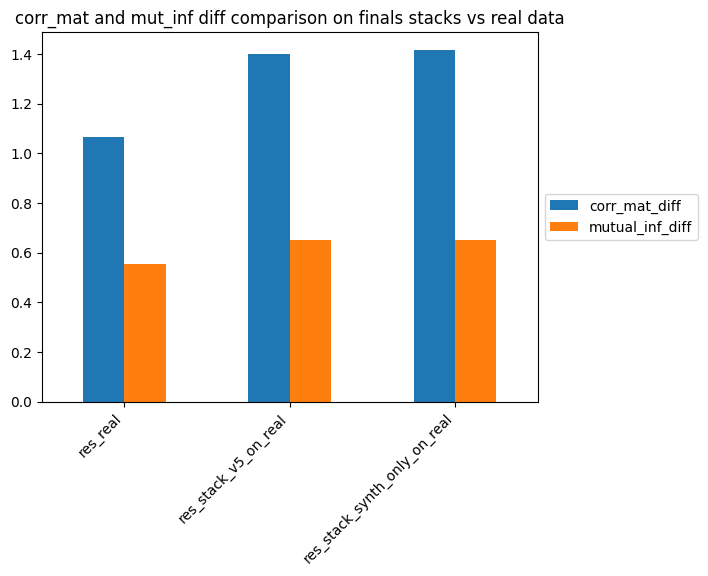

In [46]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [47]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "auroc",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["auroc", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,...,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,auroc,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.009955,0.087932,0.885263,0.264686,1.064197,0.555304,0.036907,0.166667,0.009086,0.003006,...,0.038054,0.657353,0.090406,0.072508,0.060924,0.017121,0.035714,0.284664,0.996639,0.487745
res_stack_v5_on_real,0.039291,0.114275,1.205644,0.014343,1.400845,0.649563,0.077729,0.666667,0.067753,0.025725,...,0.006166,0.728992,0.035084,0.178315,0.160714,0.139040,0.003151,0.218487,0.998319,0.427171
res_stack_synth_only_on_real,0.037090,0.114587,1.282870,0.126779,1.417326,0.652356,0.080430,0.583333,0.016582,0.022631,...,0.008488,0.753046,0.012430,0.335309,0.283613,0.328190,0.000000,0.185924,0.996639,0.411905


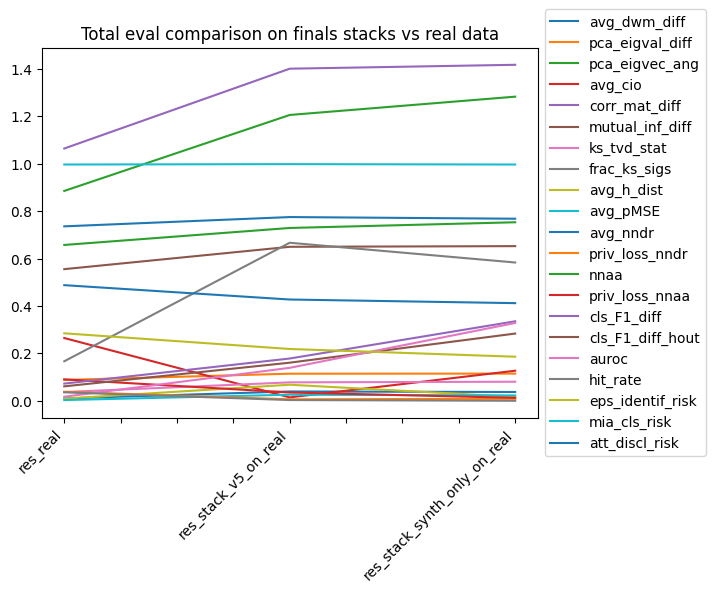

In [48]:
total_eval.plot.line()
plt.title("Total eval comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [49]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.844849,0.723296
1,res_stack_v5_on_real,0.737417,0.760313
2,res_stack_synth_only_on_real,0.718883,0.768777


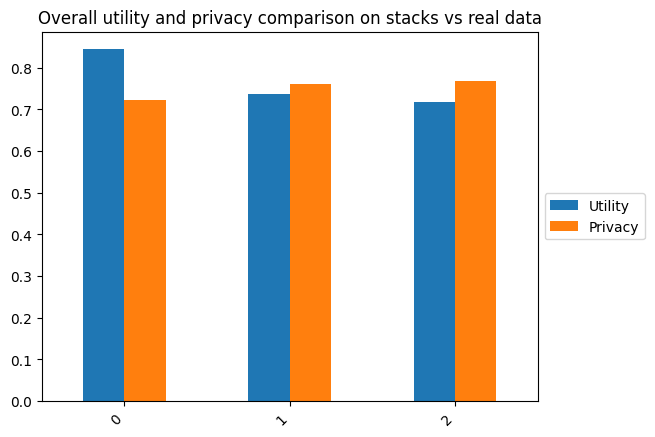

In [50]:
overall_res.plot.bar()
plt.title("Overall utility and privacy comparison on stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()